In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from create_input.lmp.info_from_lmp_out import LammpsLogParser
from scf.qelattice import get_qel

In [231]:
# interatomic_distance_range = np.round(np.linspace(0.5, 8, 100), 3)

def get_two_body_result(path2root):
    pathes = glob(f'{path2root}/tb*')
    pathes.sort()
    result = []
    for path in pathes:
        r_from_path = float(path.split('/')[-1].split('_')[-1])
        if r_from_path:
            obj = LammpsLogParser(path2target=path, dump_filename='dump.out')
            energy = obj.get_energy()
            result.append([r_from_path, energy])
        else:
            raise ValueError('not consistent')
    return np.array(result)

In [232]:
# path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_7'
# result_ml_zbl = get_two_body_result(path2root, interatomic_distance_range)
# result_ml_zbl[:, 1] = result_ml_zbl[:,1] + 1264.7168
def get_dimer_result(path2target):
    dirs = glob(f'{path2target}/scf*')
    result = []
    for d in dirs:
        try:
            qel = get_qel(d)
            coord = qel.get_coord()
            vol = qel.get_vol()
            dist = np.linalg.norm(coord[0]-coord[1])
            result.append([vol, dist, qel.get_energy(), d.split('/')[-1]])
        except Exception as e:
            print(d, e)
            
    return pd.DataFrame(data=result, columns=['vol', 'distance', 'energy', 'path'])

path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result'
result_qe = get_dimer_result(path2target)
result_qe = result_qe.sort_values(by='distance')
result_qe['energy'] = result_qe['energy'] + 1261
# ax.plot(result_1['distance'], result_1['energy']+1261, label='Quantum espresso')

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/zbl/1.2_fit'
result_zbl = get_two_body_result(path2root)

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_34 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_94 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_93 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_69 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_68 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_92 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_95 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_0 invalid: convergence NOT achieved
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_1 invalid: convergence NOT achieved
/Users/y1u0d2/desktop

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_49099/1062291975.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


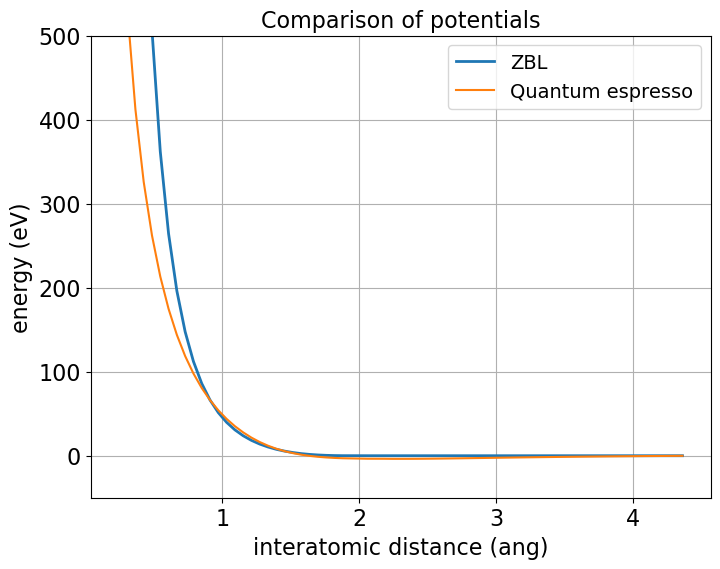

In [233]:
def plot_two_body(result, label, ax):
    ax.plot(result[:,0], result[:,1], label=label, lw=2)

fs = 16

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

plot_two_body(result_zbl, label='ZBL', ax=ax)
ax.plot(result_qe['distance'], result_qe['energy'], label='Quantum espresso')

ax.set_title('Comparison of potentials', fontsize=fs)
ax.set_xlabel('interatomic distance (ang)', fontsize=fs)
ax.set_ylabel('energy (eV)', fontsize=fs)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid()
ax.legend(fontsize=14)

# ax.set_ylim(-5, 10)
ax.set_ylim(-50, 500)

fig.show()

In [234]:
result_zbl_df = pd.DataFrame(data=result_zbl, columns=['distance', 'energy'])
result_qe_df = pd.DataFrame(data=result_qe, columns=['distance', 'energy'])

In [235]:
result_zbl_df.query('distance < 1.0')

,distance,energy
0,0.242430,2732.250900
1,0.303030,1667.833900
2,0.363630,1078.063100
3,0.424245,726.889050
4,0.484845,506.470040
5,0.545460,362.132920
6,0.606060,264.385760
7,0.666660,196.267050
8,0.727275,147.642730
9,0.787875,112.246230


In [236]:
result_qe_df.query('distance < 1.0')

,distance,energy
43,0.242430,720.985815
44,0.303030,534.901068
45,0.363630,412.356260
15,0.424245,326.020595
12,0.484845,262.230431
14,0.545460,213.337449
13,0.606060,174.837671
21,0.666660,143.893756
28,0.727275,118.663169
54,0.787875,97.889126


In [237]:
diff = result_zbl_df['energy'].values - result_qe_df['energy'].values
diff_df = pd.DataFrame(data=np.vstack([result_qe_df['distance'], diff]).T, columns=['distance', 'energy'])

In [238]:
np.all(result_qe_df['distance'].values == result_zbl_df['distance'].values)

True

In [239]:
from scipy.optimize import curve_fit
import seaborn as sns


In [240]:
upper_threshold = 0.95
distance = diff_df.query('distance < @upper_threshold')['distance'].values
energy = diff_df.query('distance < @upper_threshold')['energy'].values

In [241]:
def qe_zbl_diff(x, Z, a):
    return (Z**2 / x**1) + a

def diff_func(x, param):
    return (param[0]**2 / x**1) + param[1]

def ddiff_funcdr(x, param):
    return -3 * (param[0]**2 / x**4)

param, cov = curve_fit(qe_zbl_diff, distance, energy)

In [242]:
energy_fit = [diff_func(x, param) for x in distance]

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_49099/2683736636.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


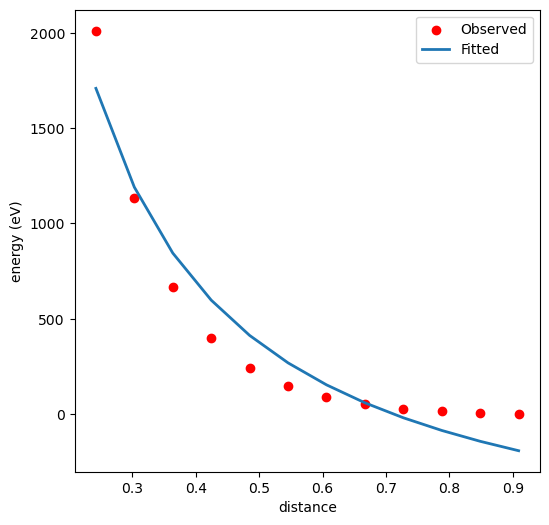

In [243]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/diff/02'
# result_diff = get_two_body_result(path2root)
# ax.plot(result_diff[:, 0], result_diff[:, 1], label='LAMMPS')

ax.scatter(distance, energy, label='Observed', color='red')
ax.plot(distance, energy_fit, label='Fitted', linewidth=2)

ax.set_xlabel('distance')
ax.set_ylabel('energy (eV)')
# ax.set_ylim(0, 100)

ax.legend()
fig.show()
# sns.pointplot(x=distance, y=energy, join=False)
# sns.pointplot(x=distance, y=energy_fit, markers='')
# sns.pointplot(x=array_x, y=array_y_fit, markers="")

In [244]:
diff_func(0.5, param), ddiff_funcdr(0.5, param)

(373.32239004093026, -30167.301983510413)

In [245]:
energy - energy_fit

array([ 302.47266683,  -57.42272747, -179.0098902 , -196.90403273,
       -168.37243859, -119.76782036,  -63.80542791,   -6.71579401,
         48.4632823 ,  100.30871394,  148.32817962,  192.4252907 ])